# Nazwa projektu - Cena za wymarzony dom

Aim of the project is to create such model which will be able to predict SalePrice of house 
for provided values of features. Features regard among others overall quality of the house, construction date
size of garage, lot area and so on. All details about every feature (column) you can find in file: data_description.txt 
in the same path.

### Imports:

In [62]:
#data manipulation
import pandas as pd
import numpy as np

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# pipeline construction
from sklearn.pipeline import Pipeline, FeatureUnion 
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

# data processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# feature selection
from sklearn.feature_selection import VarianceThreshold

# models training
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

#models testing
from sklearn import metrics

### Analysing and preprocessing of data

Read data from csv and display head of it

In [3]:
df = pd.read_csv('data.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


All details about every column you can find in file: data_description.txt in the same path. <br>
Display shape of data to see amount of rows and columns

In [4]:
df.shape

(1460, 81)

There are 1460 rows and 81 columns

Display info about data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Consider which columns should be removed due to too many missing data. We can find such columns (Column Number; Column; Non-Null Count; Dtype): 
-  6;   Alley;          91 non-null;     object
-  72;  PoolQC;         7 non-null;      object 
-  73;  Fence;          281 non-null;    object 
-  74;  MiscFeature;    54 non-null;     object

Declare amount of rows:

In [6]:
amount_of_rows = len(df.index)
amount_of_rows

1460

Percent of missing values of Alley column:

In [7]:
df['Alley'].isna().sum()/amount_of_rows*100

93.76712328767123

Percent of missing values of PoolQC column:

In [8]:
df['PoolQC'].isna().sum()/amount_of_rows*100

99.52054794520548

Percent of missing values of Fence column:

In [9]:
df['Fence'].isna().sum()/amount_of_rows*100

80.75342465753424

Percent of missing values of MiscFeature column:

In [10]:
df['MiscFeature'].isna().sum()/amount_of_rows*100

96.30136986301369

Removing above columns due to their percent of missing values are more than 80%:

In [11]:
df = df.drop(['Alley','PoolQC','Fence','MiscFeature'], axis='columns')
df.shape

(1460, 77)

In [12]:
corr = df.corr()

<AxesSubplot:>

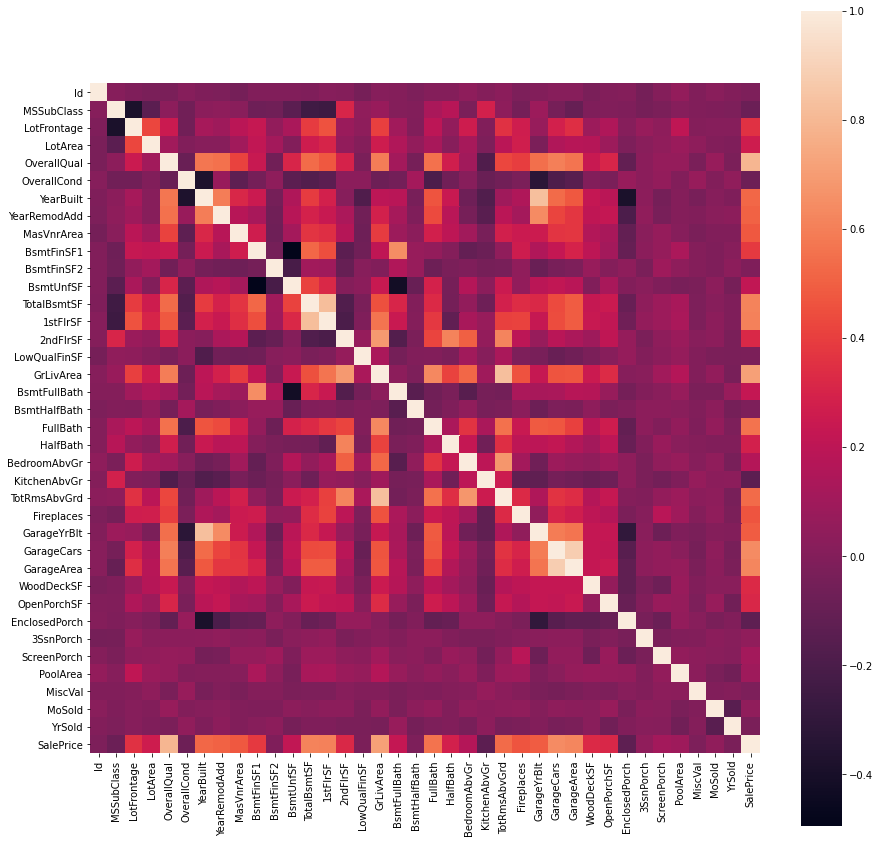

In [13]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, square=True)

In the heatmap we can see correlation between features. Among others we can see that OverallQual
is most correlated to SalePrice. Apart from the feature also YearBuilt, TotalBsmtSF, 1stFlrSF, GrLivArea
GarageCars, GarageArea are quite correlated to SalePrice. We can also see characteristic squares -
bigger one consists of GarageBlt, GarageCars and GarageAre, the smaller one consists of 
TotalBsmtSF and 1stFlrSF - we can see these features correlate each other quite strongly.

There are still missing data. Let's see which columns have missing data now

In [14]:
df.columns[df.isnull().any()]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [15]:
df.loc[:, df.isnull().any()]

,LotFrontage,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,65.0,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA
1,80.0,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA
2,68.0,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA
3,60.0,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA
4,84.0,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,None,0.0,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,1999.0,RFn,TA,TA
1456,85.0,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,1978.0,Unf,TA,TA
1457,66.0,None,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,1941.0,RFn,TA,TA
1458,68.0,None,0.0,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,1950.0,Unf,TA,TA


In [16]:
df.loc[:, df.isnull().any()].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   MasVnrType    1452 non-null   object 
 2   MasVnrArea    1452 non-null   float64
 3   BsmtQual      1423 non-null   object 
 4   BsmtCond      1423 non-null   object 
 5   BsmtExposure  1422 non-null   object 
 6   BsmtFinType1  1423 non-null   object 
 7   BsmtFinType2  1422 non-null   object 
 8   Electrical    1459 non-null   object 
 9   FireplaceQu   770 non-null    object 
 10  GarageType    1379 non-null   object 
 11  GarageYrBlt   1379 non-null   float64
 12  GarageFinish  1379 non-null   object 
 13  GarageQual    1379 non-null   object 
 14  GarageCond    1379 non-null   object 
dtypes: float64(3), object(12)
memory usage: 171.2+ KB


We can see every Garage related column has the same amount of non-null values. 
We can assume they regard the same rows. Let's check it.

Display all related Garage columns (including columns which have all non-null values).
Additionally show only rows for GarageType = null.

In [17]:
df_garage_cols = df[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageCars', 'GarageArea']]
df_garage_cols[df_garage_cols['GarageType'].isnull()]

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,GarageCars,GarageArea
39,NaN,NaN,NaN,NaN,NaN,0,0
48,NaN,NaN,NaN,NaN,NaN,0,0
78,NaN,NaN,NaN,NaN,NaN,0,0
88,NaN,NaN,NaN,NaN,NaN,0,0
89,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...
1349,NaN,NaN,NaN,NaN,NaN,0,0
1407,NaN,NaN,NaN,NaN,NaN,0,0
1449,NaN,NaN,NaN,NaN,NaN,0,0
1450,NaN,NaN,NaN,NaN,NaN,0,0


It seems all null values for columns 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'
are situated in the same rows. Even columns 'GarageCars', 'GarageArea' seem to have only 0 values. 
Let's check for sure - let's display columns where 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 
'GarageCond' have only null values and 'GarageCars', 'GarageArea' have only 0 values

In [18]:
df_garage_cols[df_garage_cols['GarageType'].isnull() & 
               df_garage_cols['GarageYrBlt'].isnull() &
               df_garage_cols['GarageFinish'].isnull() &
               df_garage_cols['GarageQual'].isnull() & 
               df_garage_cols['GarageCond'].isnull() &
               (df_garage_cols['GarageCars'] == 0) &
               (df_garage_cols['GarageArea'] == 0)]

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,GarageCars,GarageArea
39,NaN,NaN,NaN,NaN,NaN,0,0
48,NaN,NaN,NaN,NaN,NaN,0,0
78,NaN,NaN,NaN,NaN,NaN,0,0
88,NaN,NaN,NaN,NaN,NaN,0,0
89,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...
1349,NaN,NaN,NaN,NaN,NaN,0,0
1407,NaN,NaN,NaN,NaN,NaN,0,0
1449,NaN,NaN,NaN,NaN,NaN,0,0
1450,NaN,NaN,NaN,NaN,NaN,0,0


We can see again 81 rows. So we confirmed what we had assumed earlier.
As they all regard Garage we can delete those columns with missing data.
Apart from Garage related features we have such columns with missing data yet:
- LotFrontage - Linear feet of street connected to property - ok, it can be significant (heatmap says similarly)
- MasVnrType, MasVnrArea - related to masonry veneer - is client realy wondering about it? 
- BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 - for basement related features TotalBsmtSF
is kind of representative of them (heatmap reflects that)
- Electrical - Electrical system - is client realy wondering about it?
- FireplaceQu - amount of non-null values equals 770 (so it is bit low) and it looks Fireplaces feature
which has all values should be enough to cover Fireplace features (Fireplaces says about
number of fireplaces whereas FireplaceQu says about quality - Fireplaces feature seems to be more basic
and valuable)<br>

Apart from above columns - column Id is not valuable here - it tells us about order of rows only.

Let's delete all columns which we listed above (except for LotFrontage).

In [19]:
df = df.drop(['Id', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond'], axis='columns')
df.shape

(1460, 62)

In [20]:
df.loc[:, df.isnull().any()].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


As we can see only LotFrontage still has null values. We are going to impute data there but 
we will do this after splitting data into train and test data to avoid data leakage.

Let's see current list of columns again:

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In the data frame there are types: float64(1), int64(34), object(27). Let's create numeric columns and categorical columns

In [22]:
num_columns = df.select_dtypes(include=['int64','float64'])
cat_columns = df.select_dtypes(exclude=['int64','float64'])

In [23]:
num_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   BsmtFinSF1     1460 non-null   int64  
 8   BsmtFinSF2     1460 non-null   int64  
 9   BsmtUnfSF      1460 non-null   int64  
 10  TotalBsmtSF    1460 non-null   int64  
 11  1stFlrSF       1460 non-null   int64  
 12  2ndFlrSF       1460 non-null   int64  
 13  LowQualFinSF   1460 non-null   int64  
 14  GrLivArea      1460 non-null   int64  
 15  BsmtFullBath   1460 non-null   int64  
 16  BsmtHalfBath   1460 non-null   int64  
 17  FullBath       1460 non-null   int64  
 18  HalfBath

In [24]:
cat_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  ExterQual      1460 non-null   object
 17  ExterCond      1460 non-null   object
 18  Foundation     1460 non-null

Let's wonder about categorical columns. There are few columns which can be significant and reasonable to choose: 
- Street: Type of road access to property
- Utilities: Type of utilities available
- ExterQual: Evaluates the quality of the material on the exterior 
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- KitchenQual: Kitchen quality

However all quality features like: ExterQual, HeatingQC, KitchenQual seem to be included to OverallQual. Let's ignore them then. For rest (Street, Utilities, Heating, CentrailAir) we will use OneHotEncoding transformation for our model. Let's drop rest categorical columns from main data frame:

In [25]:
df = df.drop(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 
              'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 
              'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 
              'ExterCond', 'Foundation', 'HeatingQC', 'KitchenQual', 'Functional', 
              'PavedDrive', 'SaleType', 'SaleCondition'], axis='columns')
df.shape

(1460, 39)

### Splitting data into train and test set

Let's split data into training and test set:

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('SalePrice', axis=1), 
                                                    df['SalePrice'], 
                                                    test_size=0.2,
                                                    random_state=12)

Before we got to next step (data preprocessing) we need to split data to numeric and categorical data. Let's do it:

In [27]:
X_train_num = X_train.select_dtypes(include=['int64','float64'])
X_test_num = X_test.select_dtypes(include=['int64','float64'])
X_train_cat = X_train.select_dtypes(exclude=['int64','float64'])
X_test_cat = X_test.select_dtypes(exclude=['int64','float64'])

In [28]:
X_train_num.shape

(1168, 34)

In [29]:
X_test_num.shape

(292, 34)

In [30]:
X_train_cat.shape

(1168, 4)

In [31]:
X_test_cat.shape

(292, 4)

### Categorical data

Let's check categorical data and their distribution:

Columns: Street
Unique values: 2


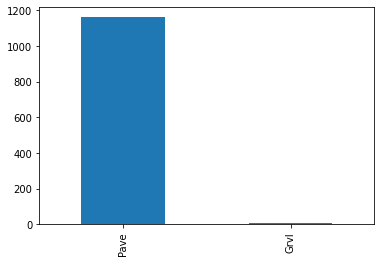

Columns: Utilities
Unique values: 1


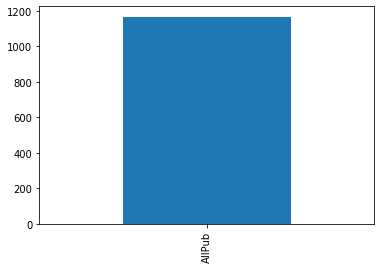

Columns: Heating
Unique values: 6


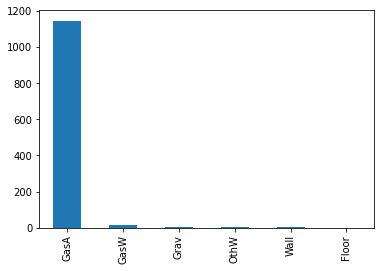

Columns: CentralAir
Unique values: 2


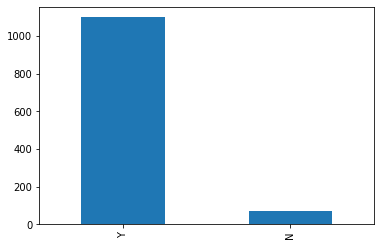

In [32]:
for column in X_train_cat:
    print(f'Columns: {column}')
    print(f'Unique values: {len(X_train_cat[column].unique())}')
    X_train_cat[column].value_counts().plot.bar()
    plt.show()

It looks Utilities column has only one value. It means the column is useless. This case is an example of variance = 0. Similarly we can assume that if any column has very low variance then it contains less information and we can also dismiss such column. To select columns we can use special trasformation: VarianceThreshold. It removes columns which has lower variance that provided threshold (variance = 0 by default). We can assume threshold = 0.05. However we should start from OneHotEncoder transformation as VarianceThreshold doesn't work for string values.

In [53]:
one = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_cat_one = one.fit_transform(X_train_cat)
X_train_cat_one

array([[0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.],
       ...,
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.]])

Show feature names:

In [54]:
one.get_feature_names(['Street', 'Utilities', 'Heating', 'CentralAir'])

array(['Street_Grvl', 'Street_Pave', 'Utilities_AllPub', 'Heating_Floor',
       'Heating_GasA', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW',
       'Heating_Wall', 'CentralAir_N', 'CentralAir_Y'], dtype=object)

Convert the OneHotEncoder transformation result to DataFrame:

In [55]:
X_train_cat_one_df = pd.DataFrame(data=X_train_cat_one[:,:],
             index=X_train_cat_one[:,0],
             columns=X_train_cat_one[0,:]) 
X_train_cat_one_df.columns = one.get_feature_names(['Street', 'Utilities', 'Heating', 'CentralAir'])
X_train_cat_one_df

,Street_Grvl,Street_Pave,Utilities_AllPub,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y
0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


Use VarianceThreshold selector now:

In [56]:
thresholder = VarianceThreshold(threshold=.05)
X_train_cat_high_variance = thresholder.fit(X_train_cat_one_df)
X_train_cat_high_variance_df = X_train_cat_one_df.loc[:, X_train_cat_high_variance.get_support()]
X_train_cat_high_variance_df

,CentralAir_N,CentralAir_Y
0.0,1.0,0.0
0.0,0.0,1.0
0.0,0.0,1.0
0.0,0.0,1.0
0.0,0.0,1.0
...,...,...
0.0,0.0,1.0
0.0,0.0,1.0
0.0,0.0,1.0
0.0,0.0,1.0


We can also confirm VarianceThreshold selector process looking at variance of every column:

In [57]:
X_train_cat_one_df.var()

Street_Grvl         0.005115
Street_Pave         0.005115
Utilities_AllPub    0.000000
Heating_Floor       0.000856
Heating_GasA        0.019321
Heating_GasW        0.011853
Heating_Grav        0.003416
Heating_OthW        0.001711
Heating_Wall        0.001711
CentralAir_N        0.055633
CentralAir_Y        0.055633
dtype: float64

In [58]:
X_train_cat_high_variance_df.var()

CentralAir_N    0.055633
CentralAir_Y    0.055633
dtype: float64

We can clearly see that only columns: CentralAir_N and CentralAir_Y have variance greater than 0.05. It means that for learning models we will use only original column: CentrailAir.

### Numeric data

For numeric data we will use SimpleImputer to impute missing data (replaces missing values using mean by default) for LotFrontage column and StandardScaler to standarize data to mean = 0, variance = 1.

### Transform and merge categorical and numeric data into one pipeline

Let's create two Trasformer classes which extend BaseEstimator and TransformerMixin - they will allow us to select specific columns by putting set of columns and select specific type of columns by putting type of column:

In [59]:
class SelectColumnsTransformer(BaseEstimator, TransformerMixin):
    def __init__( self, columns_to_select: list):
        self.columns_to_select = columns_to_select
    
    def fit( self, X, y = None ):
        return self 
    
    def transform( self, X, y = None ):
        return X[self.columns_to_select]

In [60]:
class SelectColumnsByTypeTransformer(BaseEstimator, TransformerMixin):
    def __init__( self, type_to_select):
        self.type_to_select = type_to_select
    
    def fit( self, X, y = None ):
        return self 
    
    def transform( self, X, y = None ):
        if self.type_to_select == 'numeric':
            return X.select_dtypes(include=np.number)
        else:
            return X.select_dtypes(exclude=np.number)

Now let's use all above analyses which we made after splitting data into train and test data. Let's create also categorical and numeric pipelines and combine them using FeatureUnion:

In [63]:
cat_pipeline = Pipeline([
    ("selector", SelectColumnsTransformer(['CentralAir'])), 
    ("one", OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

num_pipeline = Pipeline([
    ("selector", SelectColumnsByTypeTransformer('numeric')),
    ("imputer", SimpleImputer()),
    ("scaler", StandardScaler())
])

transformer_list = [ ('categorical_pipeline', cat_pipeline), 
                     ('numerical_pipeline', num_pipeline ) 
                   ]

combined_pipeline = FeatureUnion(transformer_list=transformer_list)

combined_pipeline

FeatureUnion(transformer_list=[('categorical_pipeline',
                                Pipeline(steps=[('selector',
                                                 SelectColumnsTransformer(columns_to_select=['CentralAir'])),
                                                ('one',
                                                 OneHotEncoder(handle_unknown='ignore',
                                                               sparse=False))])),
                               ('numerical_pipeline',
                                Pipeline(steps=[('selector',
                                                 SelectColumnsByTypeTransformer(type_to_select='numeric')),
                                                ('imputer', SimpleImputer()),
                                                ('scaler',
                                                 StandardScaler())]))])

### Regression models

LinearRegression:

In [64]:
lr_pipeline = Pipeline(steps = [
    ('combined_pipeline', combined_pipeline), 
    ('LR', LinearRegression())
])

lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('combined_pipeline',
                 FeatureUnion(transformer_list=[('categorical_pipeline',
                                                 Pipeline(steps=[('selector',
                                                                  SelectColumnsTransformer(columns_to_select=['CentralAir'])),
                                                                 ('one',
                                                                  OneHotEncoder(handle_unknown='ignore',
                                                                                sparse=False))])),
                                                ('numerical_pipeline',
                                                 Pipeline(steps=[('selector',
                                                                  SelectColumnsByTypeTransformer(type_to_select='numeric')),
                                                                 ('imputer',
                                                        

Scoring on the scaled test set

In [65]:
y_pred_lr = lr_pipeline.predict(X_test)

In [66]:
R2_lr = metrics.r2_score( y_pred = y_pred_lr ,y_true = y_test)
MAE_lr = metrics.mean_absolute_error( y_pred = y_pred_lr ,y_true = y_test)
MSE_lr = metrics.mean_squared_error( y_pred = y_pred_lr ,y_true = y_test)
print("R2: {:.2f}".format(R2_lr) )
print("MAE: {:.2f}".format(MAE_lr) )
print("MSE: {:.2f}".format(MSE_lr) )

R2: 0.78
MAE: 22161.44
MSE: 1406097223.59


SVR:

In [70]:
svr_pipe = Pipeline([
        ('combined_pipeline', combined_pipeline), 
        ('SVR', SVR(kernel='rbf', gamma=0.1))    
    ])

svr_param_grid = {
            "SVR__C": [100000, 1000000],
            "SVR__gamma": [0.001, 0.01, 0.1]
             }

Let's define kfold for cross validation for GridSearch:

In [71]:
kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=12)

Let's run GridSearch

In [72]:
svr_grid = GridSearchCV(svr_pipe, param_grid=svr_param_grid, cv=kfold)
svr_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=12, shuffle=True),
             estimator=Pipeline(steps=[('combined_pipeline',
                                        FeatureUnion(transformer_list=[('categorical_pipeline',
                                                                        Pipeline(steps=[('selector',
                                                                                         SelectColumnsTransformer(columns_to_select=['CentralAir'])),
                                                                                        ('one',
                                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                                       sparse=False))])),
                                                                       ('numerical_pipeline',
                                                                        Pipeline(steps

In [73]:
y_pred_svr = svr_grid.predict(X_test)

In [74]:
print("Best parameters: ", svr_grid.best_params_)
R2_svr = metrics.r2_score( y_pred = y_pred_svr ,y_true = y_test)
MAE_svr = metrics.mean_absolute_error( y_pred = y_pred_svr ,y_true = y_test)
MSE_svr = metrics.mean_squared_error( y_pred = y_pred_svr ,y_true = y_test)
print("R2: {:.2f}".format(R2_svr) )
print("MAE: {:.2f}".format(MAE_svr) )
print("MSE: {:.2f}".format(MSE_svr) )

Best parameters:  {'SVR__C': 1000000, 'SVR__gamma': 0.01}
R2: 0.79
MAE: 18297.53
MSE: 1317812961.47


RandomForest:

In [75]:
rf_pipe = Pipeline([
        ('combined_pipeline', combined_pipeline),
        ('RF', RandomForestRegressor())    
    ])

rf_param_grid = {
            'RF__n_estimators': [800, 900, 1000],
            'RF__max_depth':  [80, 90, 100,],
            'RF__max_features': ['log2','sqrt','auto'],
            'RF__max_leaf_nodes':  [200, 300]
             }

In [76]:
rf_grid = GridSearchCV(rf_pipe, param_grid=rf_param_grid, cv=kfold)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=12, shuffle=True),
             estimator=Pipeline(steps=[('combined_pipeline',
                                        FeatureUnion(transformer_list=[('categorical_pipeline',
                                                                        Pipeline(steps=[('selector',
                                                                                         SelectColumnsTransformer(columns_to_select=['CentralAir'])),
                                                                                        ('one',
                                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                                       sparse=False))])),
                                                                       ('numerical_pipeline',
                                                                        Pipeline(steps

In [77]:
y_pred_rf = rf_grid.predict(X_test)

In [78]:
print("Best parameters: ", rf_grid.best_params_)
R2_rf = metrics.r2_score( y_pred = y_pred_rf ,y_true = y_test)
MAE_rf = metrics.mean_absolute_error( y_pred = y_pred_rf ,y_true = y_test)
MSE_rf = metrics.mean_squared_error( y_pred = y_pred_rf ,y_true = y_test)
print("R2: {:.2f}".format(R2_rf) )
print("MAE: {:.2f}".format(MAE_rf) )
print("MSE: {:.2f}".format(MSE_rf) )

Best parameters:  {'RF__max_depth': 80, 'RF__max_features': 'sqrt', 'RF__max_leaf_nodes': 300, 'RF__n_estimators': 900}
R2: 0.82
MAE: 17387.38
MSE: 1151034173.93


GradientBoosting:

In [79]:
gbr_pipe = Pipeline([
        ('combined_pipeline', combined_pipeline),
        ('GBR', GradientBoostingRegressor())    
    ])

gbr_param_grid = {
              'GBR__learning_rate': [0.02,0.03,0.04],
              'GBR__subsample'    : [0.7,0.5,0.4],
              'GBR__n_estimators' : [400,500,600],
              'GBR__max_depth'    : [8,10]
             }

In [80]:
gbr_grid = GridSearchCV(gbr_pipe, param_grid=gbr_param_grid, cv=kfold)
gbr_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=12, shuffle=True),
             estimator=Pipeline(steps=[('combined_pipeline',
                                        FeatureUnion(transformer_list=[('categorical_pipeline',
                                                                        Pipeline(steps=[('selector',
                                                                                         SelectColumnsTransformer(columns_to_select=['CentralAir'])),
                                                                                        ('one',
                                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                                       sparse=False))])),
                                                                       ('numerical_pipeline',
                                                                        Pipeline(steps

In [81]:
y_pred_gbr = gbr_grid.predict(X_test)

In [82]:
print("Best parameters: ", gbr_grid.best_params_)
R2_gbr = metrics.r2_score( y_pred = y_pred_gbr ,y_true = y_test)
MAE_gbr = metrics.mean_absolute_error( y_pred = y_pred_gbr ,y_true = y_test)
MSE_gbr = metrics.mean_squared_error( y_pred = y_pred_gbr ,y_true = y_test)
print("R2: {:.2f}".format(R2_gbr) )
print("MAE: {:.2f}".format(MAE_gbr) )
print("MSE: {:.2f}".format(MSE_gbr) )

Best parameters:  {'GBR__learning_rate': 0.04, 'GBR__max_depth': 8, 'GBR__n_estimators': 600, 'GBR__subsample': 0.4}
R2: 0.81
MAE: 16852.01
MSE: 1192877956.71


In [83]:
lasso_pipe = Pipeline([
        ('combined_pipeline', combined_pipeline), 
        ('Lasso', Lasso())    
    ])

lasso_param_grid = {
              'Lasso__alpha': [100, 1000, 10000]
             }

In [84]:
lasso_grid = GridSearchCV(lasso_pipe, param_grid=lasso_param_grid, cv=kfold)
lasso_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=12, shuffle=True),
             estimator=Pipeline(steps=[('combined_pipeline',
                                        FeatureUnion(transformer_list=[('categorical_pipeline',
                                                                        Pipeline(steps=[('selector',
                                                                                         SelectColumnsTransformer(columns_to_select=['CentralAir'])),
                                                                                        ('one',
                                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                                       sparse=False))])),
                                                                       ('numerical_pipeline',
                                                                        Pipeline(steps

In [85]:
y_pred_lasso = lasso_grid.predict(X_test)

In [86]:
print("Best parameters: ", lasso_grid.best_params_)
R2_lasso = metrics.r2_score( y_pred = y_pred_lasso ,y_true = y_test)
MAE_lasso = metrics.mean_absolute_error( y_pred = y_pred_lasso ,y_true = y_test)
MSE_lasso = metrics.mean_squared_error( y_pred = y_pred_lasso ,y_true = y_test)
print("R2: {:.2f}".format(R2_lasso) )
print("MAE: {:.2f}".format(MAE_lasso) )
print("MSE: {:.2f}".format(MSE_lasso) )

Best parameters:  {'Lasso__alpha': 1000}
R2: 0.78
MAE: 21764.98
MSE: 1380901181.41


Let's show plots to visualise difference between true values and predicted values of SalePrice for every model:

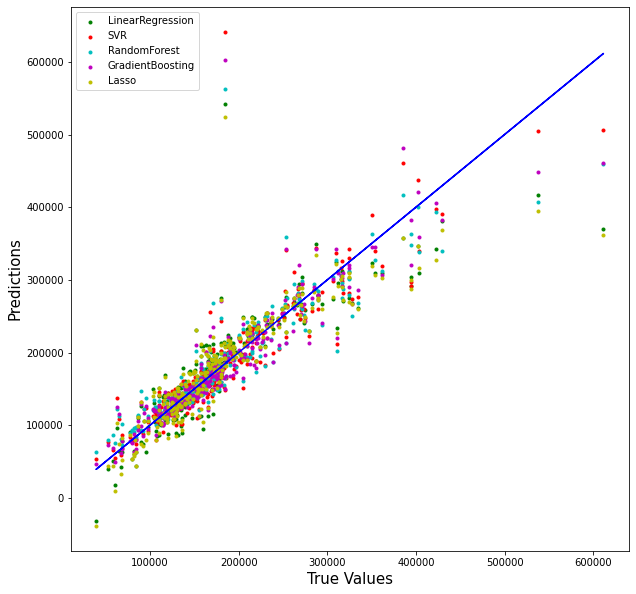

In [87]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_lr, marker='.', color='g', label='LinearRegression')
plt.scatter(y_test, y_pred_svr, marker='.', color='r', label='SVR')
plt.scatter(y_test, y_pred_rf, marker='.', color='c', label='RandomForest')
plt.scatter(y_test, y_pred_gbr, marker='.', color='m', label='GradientBoosting')
plt.scatter(y_test, y_pred_lasso, marker='.', color='y', label='Lasso')
plt.legend(loc="upper left")

plt.plot(y_test, y_test, 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.show()


Let's add log scale:

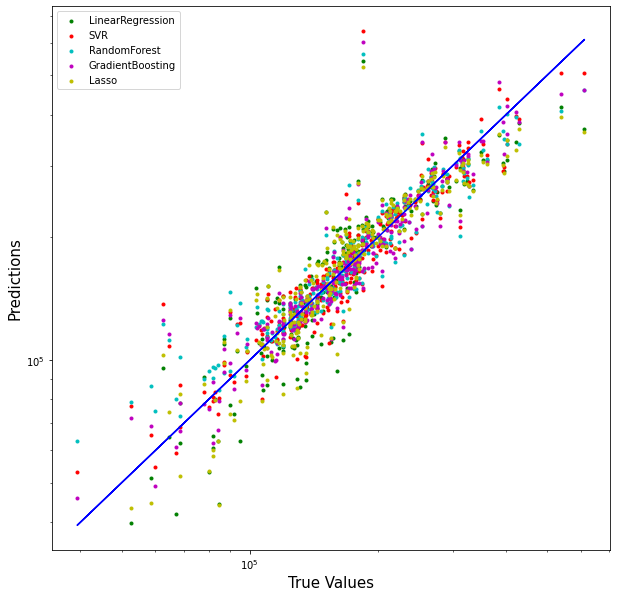

In [88]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_lr, marker='.', color='g', label='LinearRegression')
plt.scatter(y_test, y_pred_svr, marker='.', color='r', label='SVR')
plt.scatter(y_test, y_pred_rf, marker='.', color='c', label='RandomForest')
plt.scatter(y_test, y_pred_gbr, marker='.', color='m', label='GradientBoosting')
plt.scatter(y_test, y_pred_lasso, marker='.', color='y', label='Lasso')
plt.legend(loc="upper left")

plt.yscale('log')
plt.xscale('log')

plt.plot(y_test, y_test, 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.show()

R2, MAE and MSE comparison:

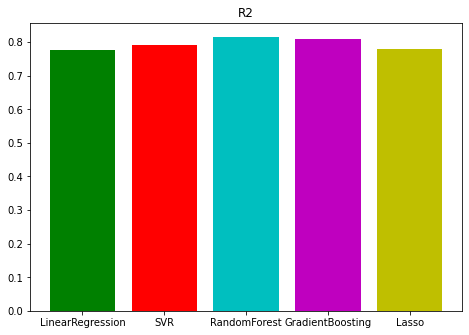

In [89]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['LinearRegression', 'SVR', 'RandomForest', 'GradientBoosting', 'Lasso']
R2 = [R2_lr,R2_svr,R2_rf,R2_gbr,R2_lasso]
ax.bar(models,R2,color=['g', 'r', 'c', 'm', 'y'])
plt.title("R2")
plt.show()

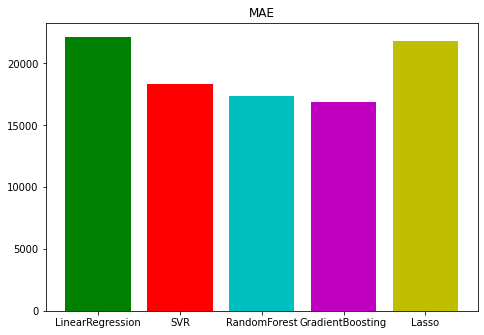

In [90]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['LinearRegression', 'SVR', 'RandomForest', 'GradientBoosting', 'Lasso']
MAE = [MAE_lr,MAE_svr,MAE_rf,MAE_gbr,MAE_lasso]
ax.bar(models,MAE,color=['g', 'r', 'c', 'm', 'y'])
plt.title("MAE")
plt.show()

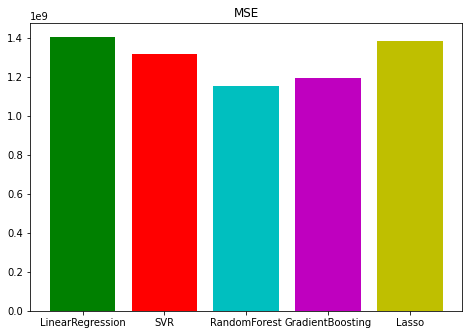

In [91]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['LinearRegression', 'SVR', 'RandomForest', 'GradientBoosting', 'Lasso']
MSE = [MSE_lr,MSE_svr,MSE_rf,MSE_gbr,MSE_lasso]
ax.bar(models,MSE,color=['g', 'r', 'c', 'm', 'y'])
plt.title("MSE")
plt.show()

### Conclusions:

As we can see the best R2 and MSE results comes from RandomForestRegressor. GradientBoosting is also quite good as it has the best MAE result. The best R2=0.82 is quite good but it can be much closer to 1.00. In true values versus predicted values plots we can also see some outliers (especially the most up - every model predicts so significant outlier). It means there is still possibility to bring to perfection our models or/and optimise features.